# **금융경제학**

- 금융경제학 (박기영 저, 시그마프레스) 교재에 사용된 데이터/모형/그래프 관련 작업을 수행하는 python notebook 파일임: https://github.com/FinancialEconomicsPython
- python 코드는 구글 코랩에서 사용하는 것을 기준으로 작성되었음.
- 데이터 파일이 필요한 경우 위치: https://drive.google.com/drive/folders/1sArqUZKnxWtkNtHe31iD1w-2xCVEhTj0?usp=share_link
- date: 2025/3/22, updated: 2026/1/30

# 사전준비
## 수정이 필요한 부분

- 아래 셀에서 BASE에는 본인의 구글 드라이브 경로, key_api_ECOS에는 본인의 한국은행 ECOS open API key를 입력해야 합니다.
  - 한국은행 ECOS open API key 신청은 다음 링크에서 할 수 있습니다: https://ecos.bok.or.kr/api/#/

- UTILS, FIGS의 경우 BASE에서 지정한 폴더 아래 UTILS, FIGS 폴더를 동일하게 만들고 해당 폴더에 있는 파일들을 저장할 경우 수정할 필요 없습니다.



In [1]:
# ============================
# 🎯 사용자별 맞춤 설정 영역
# ============================

# Google Drive 상 Colab 프로젝트 기본 폴더 경로 (각자 환경에 맞게 수정)
BASE = "/content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics"

# 한국은행 ECOS API 인증키 (개인별 발급)
key_api_ECOS = "YOUR_ECOS_API_KEY_HERE"

if ("YOUR_ECOS_API_KEY_HERE" in key_api_ECOS):
    print("⚠️ ECOS API 인증키가 설정되지 않았습니다.")
    print("   'key_api_ECOS'에 본인의 API 키를 입력한 뒤 다시 실행하세요.")
    raise SystemExit

# 서브폴더 지정 (utils, figures 등)
UTILS = f"{BASE}/utils"
FIGS  = f"{BASE}/figures"

## Preamble 및 필요한 라이브러리/함수 불러오기
- PublicDataReader 라이브러리 불러오기
- utils 폴더에 있는 preamble_core.py 불러오기
  - google drive 연결
  - 출력 DPI 조정
- utils 폴더에 있는 plot_utils.py 불러오기
  - plot_dual_axis를 이용해서 y축 왼쪽, 오른쪽 모두 사용하는 그림 그리기
- koreanize_matplotlib 라이브러리: 그림에서 한글 깨짐 방지

In [2]:
# PublicDataReader 라이브러리 불러오기
!pip -q install publicdatareader
from PublicDataReader import Ecos

# ============================
# 📦 Preamble 불러오기
# ============================

from google.colab import drive
drive.mount("/content/drive", force_remount=True)

import sys, os, importlib
if UTILS not in sys.path:
    sys.path.append(UTILS)

# preamble_core 불러오기
from preamble_core import setup_notebook, bind_env, save_fig

# 노트북 공통 환경 설정
setup_notebook(save_dir=FIGS, seaborn_use=True)
bind_env(globals())   # Colab에서도 plt/np/pd 활성화

# Colab 화면 출력용/파일 저장용 DPI 설정
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 100   # 화면 렌더링
plt.rcParams["savefig.dpi"] = 600  # 파일 저장

# 그래프 그리는 plot_dual_axis() 불러오기
import plot_utils
importlib.reload(plot_utils)
from plot_utils import plot_dual_axis

# koreanize_matplotlib 설치
# 1. 라이브러리 설치 (이미 되어 있다면 생략 가능)
!pip -q install koreanize-matplotlib

# 2. 임포트
import koreanize_matplotlib
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 186.0/186.0 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 100.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 6.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.3 which is incompatible.
google-adk 1.23.0 requires requests<3.0.0,>=2.32.4, but you have requests 2.32.3 which is incompatible.
Mounted at /content/drive
✅ Notebook environment initialized.
📂 Figures will be saved to: /content/drive/MyDrive/Colab Notebooks/book_F

## NBER recession dates 불러오기
- utils 폴더의 nber_utils를 통해 NBER recession dates 불러오기

✅ nber_utils ready (functions: load_and_process_nber_data, plot_nber_recession)
✅ NBER recession data loaded successfully.
📅 Number of cycles detected: 34
✅ NBER monthly cycles loaded: 34 periods


,peak,trough
26,1969-12-01,1970-11-01
27,1973-11-01,1975-03-01
28,1980-01-01,1980-07-01
29,1981-07-01,1982-11-01
30,1990-07-01,1991-03-01
31,2001-03-01,2001-11-01
32,2007-12-01,2009-06-01
33,2020-02-01,2020-04-01


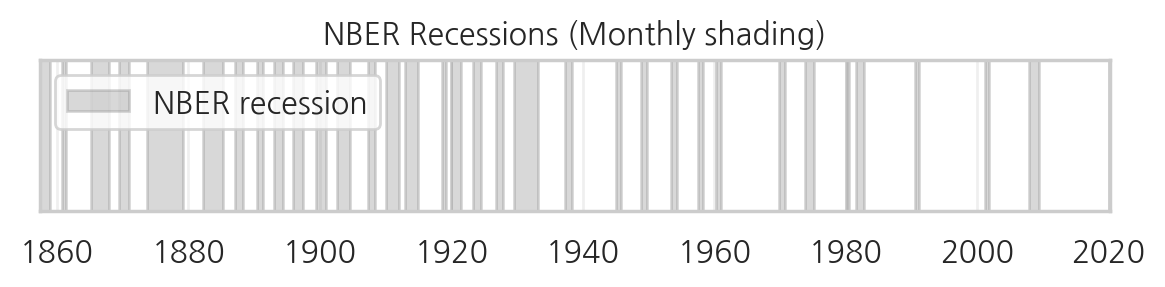

In [3]:
# ============================
# 📊 NBER 경기순환 데이터 로딩
# ============================

import nber_utils

# Colab 전역 네임스페이스에 함수 주입 (load_and_process_nber_data, plot_nber_recession)
if hasattr(nber_utils, "bind_env"):
    nber_utils.bind_env(globals())
else:
    print("⚠️ bind_env() not found in nber_utils (확인 필요).")

# NBER Business Cycle Dating Committee spreadsheet
url = "https://www.nber.org/sites/default/files/2023-03/BCDC_spreadsheet_for_website.xlsx"
NBERm, NBERq = nber_utils.load_and_process_nber_data(url)

print(f"✅ NBER monthly cycles loaded: {len(NBERm)} periods")
display(NBERm.tail(8))

# ============================
# 🖼️ 예시: 경기침체 구간 시각화
# ============================

fig, ax = plt.subplots(figsize=(6, 1.6))
ax.set_xlim(pd.Timestamp("1961-01-01"), pd.Timestamp("2025-12-31"))
ax.set_ylim(0, 1)
ax.set_yticks([])

plot_nber_recession(ax, NBERm, clip_to_xlim=True, keep_xlim=True, label="NBER recession")

ax.set_title("NBER Recessions (Monthly shading)", fontsize=11)
ax.grid(True, alpha=0.3)
ax.legend(loc="upper left")
plt.tight_layout()
plt.show()

# END OF PREAMBLE

# Main

## 연방기금금리와 만기별 국채금리와의 관계


In [4]:
# Federal Funds Effective Rate (FEDFUNDS)
# Market Yield on U.S. Treasury Securities: 1-month, 1, 2, 10, 30-year
# GS1M is available from July 2001

var_list = ['FEDFUNDS','GS1M','GS1','GS2','GS10','GS30']
start = date(2002,1,1)
end = date(2025,1,31)

df_us = pdr.get_data_fred(var_list, start=start, end=end)
print(df_us.head())

            FEDFUNDS  GS1M   GS1   GS2  GS10  GS30
DATE                                              
2002-01-01     1.730 1.680 2.160 3.030 5.040 5.450
2002-02-01     1.740 1.740 2.230 3.020 4.910 5.450
2002-03-01     1.730 1.790 2.570 3.560 5.280 5.810
2002-04-01     1.750 1.720 2.480 3.420 5.210 5.790
2002-05-01     1.750 1.740 2.350 3.260 5.160 5.760


Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/various_rate_us.png


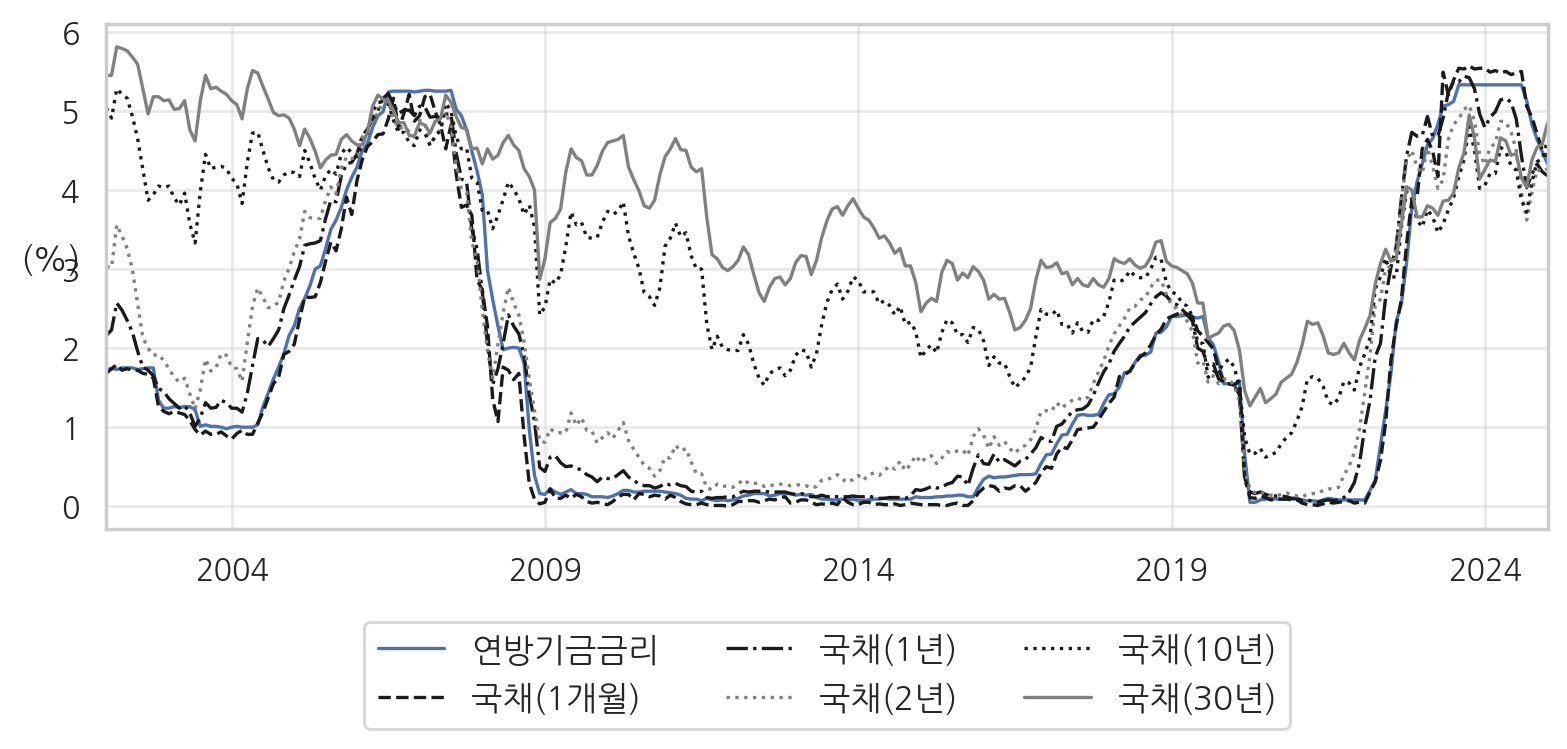

In [7]:
start_date = 2002
end_date = 2025

fig, ax = plt.subplots(figsize=(8,4))

df_us.loc[str(start_date):str(end_date), 'FEDFUNDS'].plot(
    ax=ax, linewidth=1.2
)
df_us.loc[str(start_date):str(end_date), 'GS1M'].plot(
    ax=ax, color='k', linestyle='--', linewidth=1.2
)
df_us.loc[str(start_date):str(end_date), 'GS1'].plot(
    ax=ax, color='k', linestyle='-.', linewidth=1.2
)
df_us.loc[str(start_date):str(end_date), 'GS2'].plot(
    ax=ax, color='gray', linestyle=':', linewidth=1.2
)
df_us.loc[str(start_date):str(end_date), 'GS10'].plot(
    ax=ax, color='k', linestyle=':', linewidth=1.2
)
df_us.loc[str(start_date):str(end_date), 'GS30'].plot(
    ax=ax, color='gray', linewidth=1.2
)

ax.legend(
    ['연방기금금리','국채(1개월)','국채(1년)','국채(2년)','국채(10년)','국채(30년)'],
    fontsize=12,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=3
)

ax.set_xlabel('')
ax.set_ylabel('(%)', rotation=0)

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.grid(True, alpha=0.4)

# NBER recession shading (월자료)
plot_nber_recession(ax, NBERm)

save_fig('various_rate_us')
plt.show()

In [8]:
df_us.corr()

,FEDFUNDS,GS1M,GS1,GS2,GS10,GS30
FEDFUNDS,1.000,0.992,0.978,0.950,0.683,0.479
GS1M,0.992,1.000,0.980,0.951,0.668,0.461
GS1,0.978,0.980,1.000,0.989,0.718,0.499
GS2,0.950,0.951,0.989,1.000,0.788,0.577
GS10,0.683,0.668,0.718,0.788,1.000,0.949
GS30,0.479,0.461,0.499,0.577,0.949,1.000


## 한국은행 기준금리와 기업/가계/주택담보대출 금리 관계
- ECOS 통계 코드 검색: https://ecos.bok.or.kr/api/#/DevGuide/StatisticalCodeSearch

In [12]:
def ECOS_generate_TS_monthly(df, varlist):
    '''
    ECOS에서 불러 온 df에서 원하는 변수로만 df로 만들기 (monthly 경우)
    df: api.get_statistic_search로 불러온 df
    varlist: 원하는 변수 리스트 (예: ['CP(91일)', '국고채(3년)'])
    '''
    df = df.loc[df['통계항목명1'].isin(varlist)]
    df = df.loc[:, ['통계항목명1', '시점', '값']]
    df['시점'] = pd.to_datetime(df['시점'], format='%Y%m', errors='coerce')
    df = df.sort_values(by=['통계항목명1', '시점'])
    df = pd.pivot(df, index='시점', columns='통계항목명1', values='값')
    df = df.astype(float)
    return df

def ECOS_generate_TS_quarterly(df, varlist):
    '''
    ECOS에서 불러 온 df에서 원하는 변수로만 df로 만들기 (quarterly 경우)
    df: api.get_statistic_search로 불러온 df
    varlist: 원하는 변수 리스트 (예: ['CP(91일)', '국고채(3년)'])
    '''
    df = df.loc[df['통계항목명1'].isin(varlist)]
    df = df.loc[:, ['통계항목명1', '시점', '값']]

    df['시점'] = df['시점'].str.replace('Q', '', regex=True)  # Remove 'Q' if present
    df['연도'] = df['시점'].str[:4].astype(int)  # Extract year
    df['분기'] = df['시점'].str[4:].astype(int)  # Extract quarter
    df['시점'] = pd.to_datetime(df['연도'].astype(str) + '-' + (df['분기'] * 3 - 2).astype(str) + '-01')
    df = df.drop(columns=['연도', '분기'])  # Drop intermediate columns

    df = df.sort_values(by=['통계항목명1', '시점'])
    df = pd.pivot(df, index='시점', columns='통계항목명1', values='값')
    df = df.astype(float)

    return df

In [9]:
# API key
key_api = key_api_ECOS
service_key = key_api
api = Ecos(service_key)

In [10]:
date_start = '202001'
date_end = '202502'

# 예금은행 대출금리(신규취급액 기준): 121Y006
df1 = api.get_statistic_search(통계표코드="121Y006", 주기="M",
            검색시작일자=date_start, 검색종료일자=date_end)
# 한국은행 기준금리: 722Y001
df2 = api.get_statistic_search(통계표코드="722Y001", 주기="M",
            검색시작일자=date_start, 검색종료일자=date_end)

print(df1.tail(3))
df2.tail(3)

        통계표코드                             통계명   통계항목코드1     통계항목명1 통계항목코드2  \
1175  121Y006  1.3.3.2.1. 예금은행 대출금리(신규취급액 기준)  BECBLA04  공공및기타부문대출    None   
1176  121Y006  1.3.3.2.1. 예금은행 대출금리(신규취급액 기준)  BECBLA05     상업어음할인    None   
1177  121Y006  1.3.3.2.1. 예금은행 대출금리(신규취급액 기준)  BECBLA07   기업일반자금대출    None   

      ... 통계항목명4   단위   WGT      시점     값  
1175  ...   None  연리%  None  202502  4.25  
1176  ...   None  연리%  None  202502   5.4  
1177  ...   None  연리%  None  202502   4.4  

[3 rows x 14 columns]


,통계표코드,통계명,통계항목코드1,통계항목명1,통계항목코드2,...,통계항목명4,단위,WGT,시점,값
555,722Y001,1.3.1. 한국은행 기준금리 및 여수신금리,0111000,영세자영업자지원 프로그램대출금리,None,...,None,연%,None,202502,1.25
556,722Y001,1.3.1. 한국은행 기준금리 및 여수신금리,0112000,지방중소기업지원 프로그램대출금리,None,...,None,연%,None,202502,1.25
557,722Y001,1.3.1. 한국은행 기준금리 및 여수신금리,0113000,설비투자지원 프로그램대출금리,None,...,None,연%,None,202502,1.25


In [13]:
varlist = ['기업대출','가계대출','주택담보대출']
df_kor = ECOS_generate_TS_monthly(df1,varlist)

varlist = ['한국은행 기준금리']
df_policyrate = ECOS_generate_TS_monthly(df2,varlist)

df_kor = pd.concat([df_kor, df_policyrate], axis=1)
df_kor.rename(columns={'한국은행 기준금리':'기준금리'},inplace=True)
df_kor.tail(3)

통계항목명1,가계대출,기업대출,주택담보대출,기준금리
시점,,,,
2024-12-01,4.720,4.620,4.250,3.000
2025-01-01,4.650,4.500,4.270,3.000
2025-02-01,4.520,4.430,4.230,2.750


Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/various_rate_kor.png


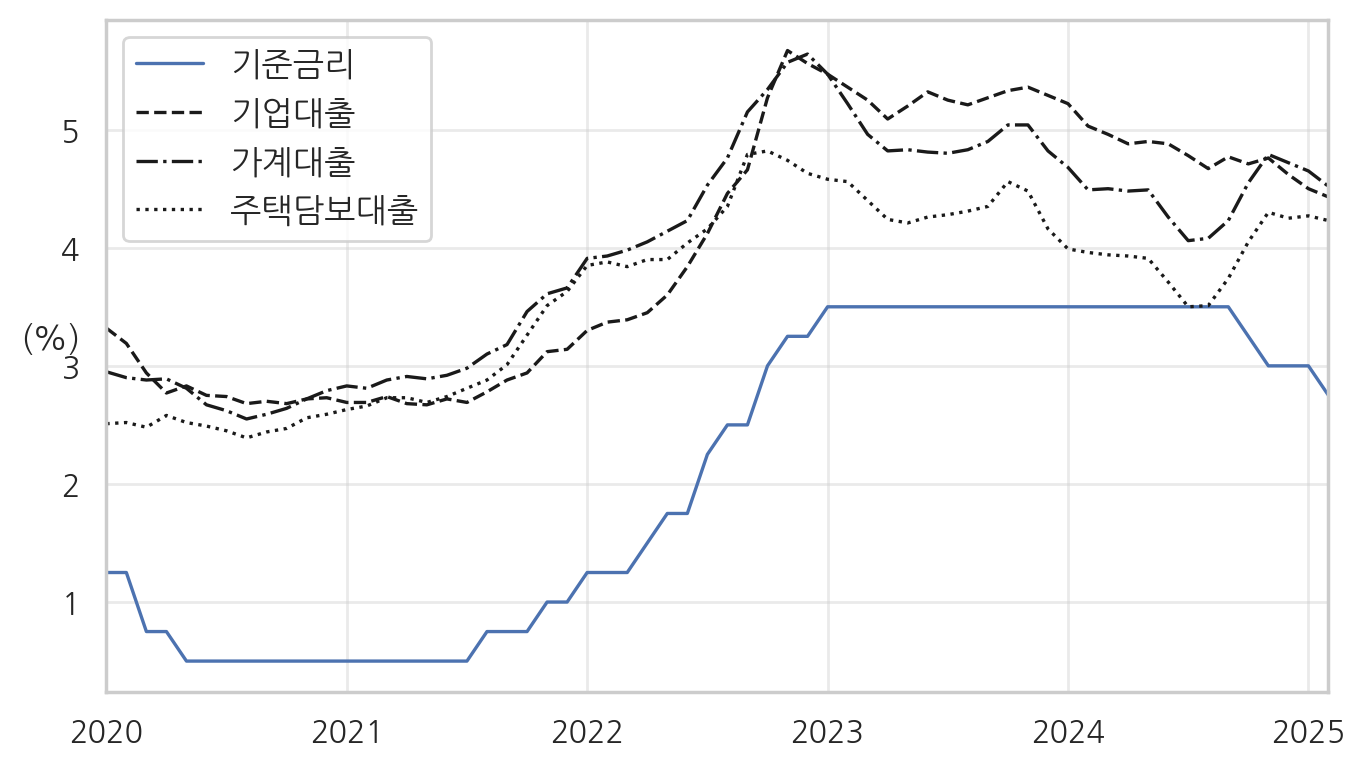

In [15]:
start_date = 2020
end_date = 2025

fig, ax = plt.subplots(figsize=(7,4))

df_kor.loc[str(start_date):str(end_date), '기준금리'].plot(
    ax=ax, linewidth=1.2
)
df_kor.loc[str(start_date):str(end_date), '기업대출'].plot(
    ax=ax, color='k', linestyle='--', linewidth=1.2
)
df_kor.loc[str(start_date):str(end_date), '가계대출'].plot(
    ax=ax, color='k', linestyle='-.', linewidth=1.2
)
df_kor.loc[str(start_date):str(end_date), '주택담보대출'].plot(
    ax=ax, color='k', linestyle=':', linewidth=1.2
)

ax.legend(
    ['기준금리','기업대출','가계대출','주택담보대출'],
    fontsize=12,
    loc='best'
)

ax.set_xlabel('')
ax.set_ylabel('(%)', rotation=0)

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.grid(True, alpha=0.4)

save_fig('various_rate_kor')
plt.show()


## 연방기금금리와 이자보상비율

In [16]:
# Federal Funds Effective Rate (FEDFUNDS)
# Nonfinancial Corporate Business; Earnings Before Interest and Tax (FSIs), Transactions (BOGZ1FA106110115Q)
# Nonfinancial Corporate Business; Net Interest and Miscellaneous Payments, Transactions (BOGZ1FA106130003Q)

var_list = ['FEDFUNDS','BOGZ1FA106110115Q','BOGZ1FA106130003Q']
#var_list = ['FEDFUNDS']
start = date(1965,1,1)
end = date(2025,1,31)

df = pdr.get_data_fred(var_list, start=start, end=end)
print(df.head())

            FEDFUNDS  BOGZ1FA106110115Q  BOGZ1FA106130003Q
DATE                                                      
1965-01-01     3.900         85,875.000          5,652.000
1965-02-01     3.980                NaN                NaN
1965-03-01     4.050                NaN                NaN
1965-04-01     4.090         87,733.000          5,835.000
1965-05-01     4.100                NaN                NaN


In [17]:
# 연방기금금리를 월에서 분기 평균으로 변환
df['연방기금금리'] = df['FEDFUNDS'].resample('QE-JAN').mean().reindex(df.index, method='ffill')

# 이자보상비율
df['이자보상비율'] = 100*df['BOGZ1FA106130003Q']/df['BOGZ1FA106110115Q']

df_coverage = df[['연방기금금리', '이자보상비율']]
df_coverage = df_coverage.dropna()

Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/coverage_us.png


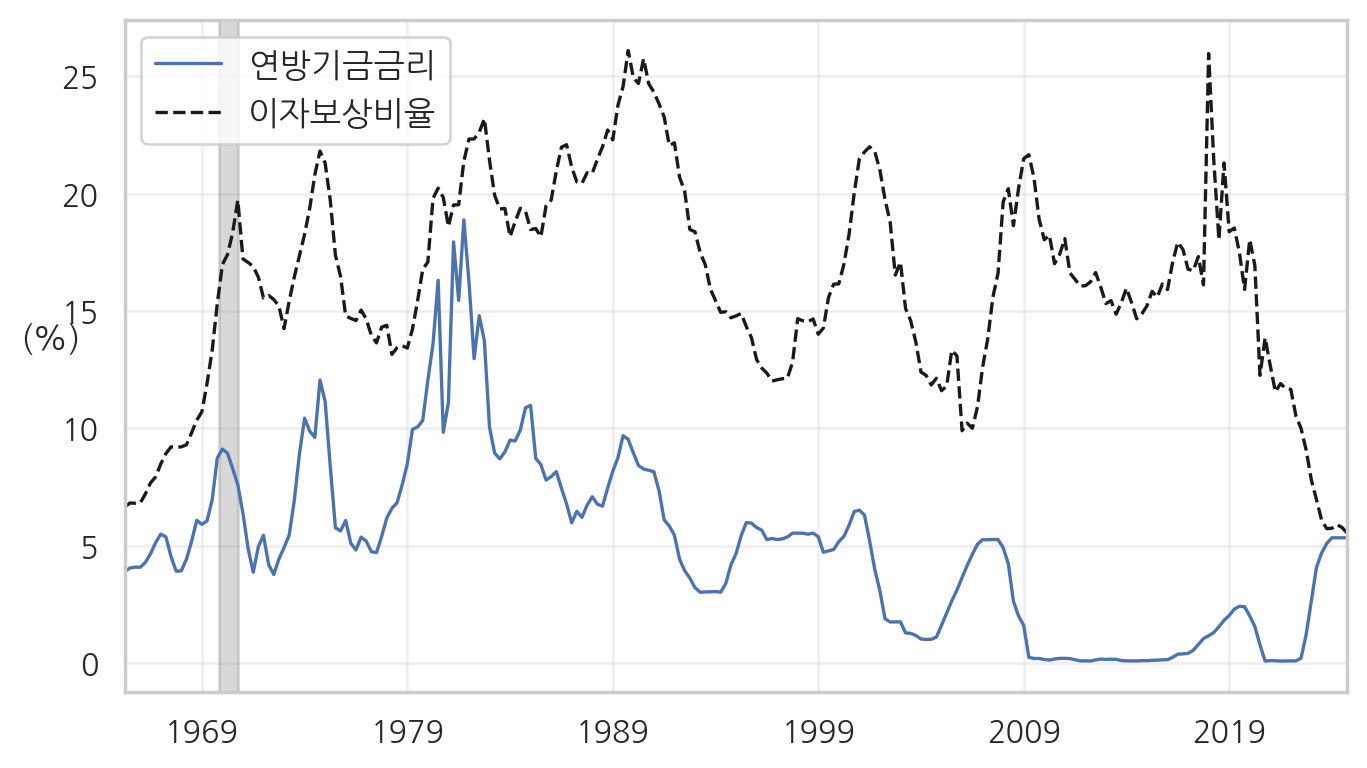

In [20]:
start_date = 1965
end_date = 2024

fig, ax = plt.subplots(figsize=(7,4))

df_coverage.loc[str(start_date):str(end_date),'연방기금금리'].plot(ax=ax, linewidth=1.2)
df_coverage.loc[str(start_date):str(end_date),'이자보상비율'].plot(ax=ax, color='k', linestyle='--', linewidth=1.2)

ax.legend(
    ['연방기금금리','이자보상비율'],
    fontsize=12,
    loc='best'
)

ax.set_xlabel('')
ax.set_ylabel('(%)', rotation=0)

ax.grid(True)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

plot_nber_recession(ax, NBERq)

save_fig('coverage_us')
plt.show()

## 대출행태 서베이


In [21]:
date_start = '2015Q1'
date_end = '2024Q4'

# 대출행태 서배이(대출태도): 514Y001
df1 = api.get_statistic_search(통계표코드="514Y001", 주기="Q",
            검색시작일자=date_start, 검색종료일자=date_end)
# 대출행태 서베이(대출수요): 514Y003
df2 = api.get_statistic_search(통계표코드="514Y003", 주기="Q",
            검색시작일자=date_start, 검색종료일자=date_end)

print(df1.tail(3))
df2.tail(3)

       통계표코드                   통계명 통계항목코드1  통계항목명1 통계항목코드2  ... 통계항목명4    단위  \
357  514Y001  6.5.1. 대출행태서베이(대출태도)      KK  신용카드회사    None  ...   None  None   
358  514Y001  6.5.1. 대출행태서베이(대출태도)      QQ  상호금융조합    None  ...   None  None   
359  514Y001  6.5.1. 대출행태서베이(대출태도)      RR  생명보험회사    None  ...   None  None   

      WGT      시점    값  
357  None  2024Q4  -14  
358  None  2024Q4  -33  
359  None  2024Q4  -24  

[3 rows x 14 columns]


,통계표코드,통계명,통계항목코드1,통계항목명1,통계항목코드2,...,통계항목명4,단위,WGT,시점,값
357,514Y003,6.5.3. 대출행태서베이(대출수요),PP,신용카드회사,None,...,None,None,None,2024Q4,0
358,514Y003,6.5.3. 대출행태서베이(대출수요),WW,상호금융조합,None,...,None,None,None,2024Q4,-1
359,514Y003,6.5.3. 대출행태서베이(대출수요),XX,생명보험회사,None,...,None,None,None,2024Q4,8


In [22]:
varlist = ['국내은행-차주가중종합지수','국내은행-대기업','국내은행-중소기업','국내은행-가계(일반)','국내은행-가계(주택)']
df_supply = ECOS_generate_TS_quarterly(df1,varlist)

varlist = ['국내은행-차주가중종합지수','국내은행-대기업','국내은행-중소기업','국내은행-가계(일반)','국내은행-가계(주택)']
df_demand = ECOS_generate_TS_quarterly(df2,varlist)

<Axes: xlabel='시점'>

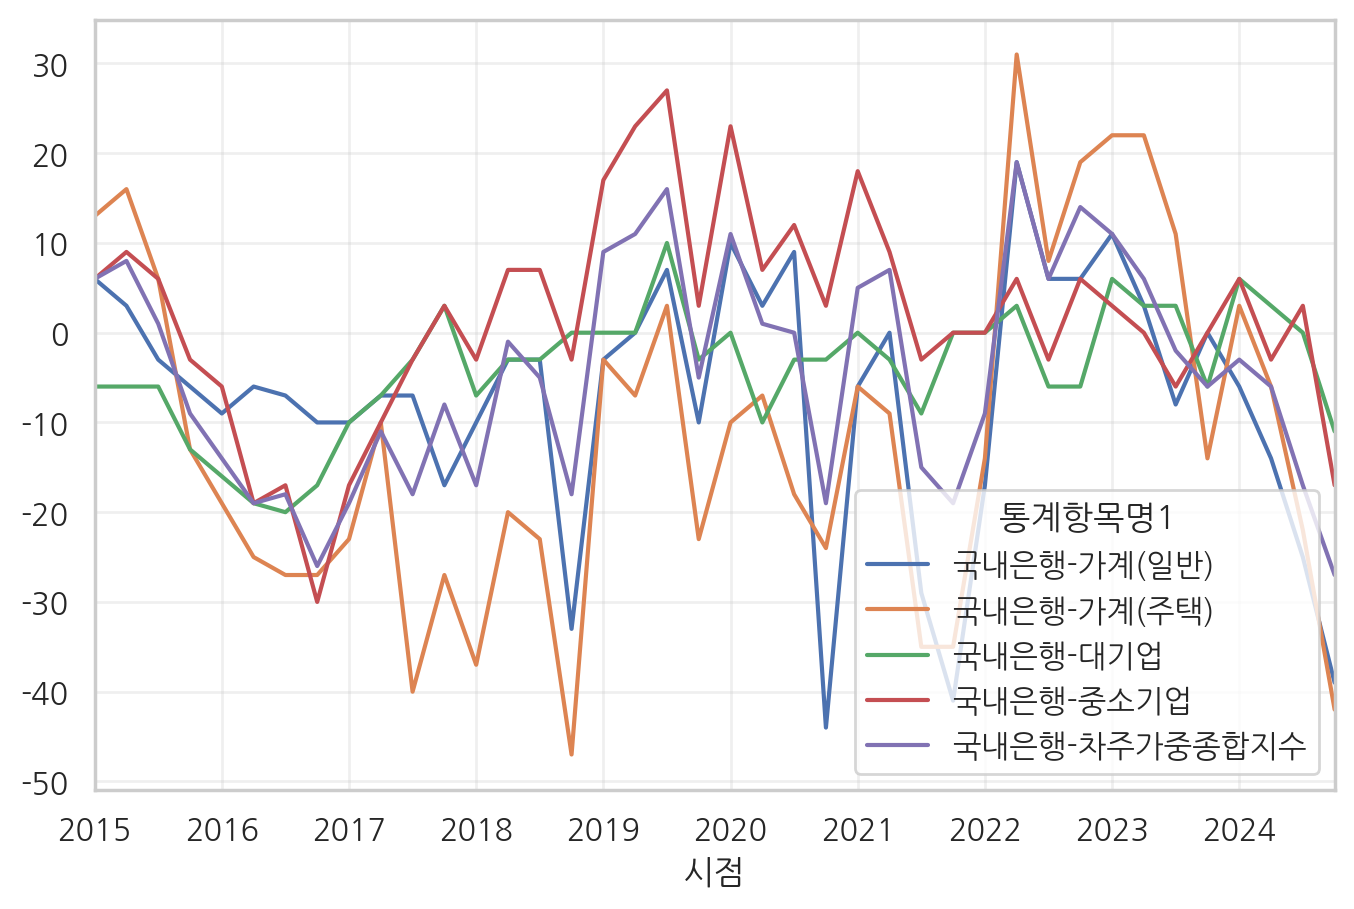

In [23]:
df_supply.plot()

Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/attitude_supply.png


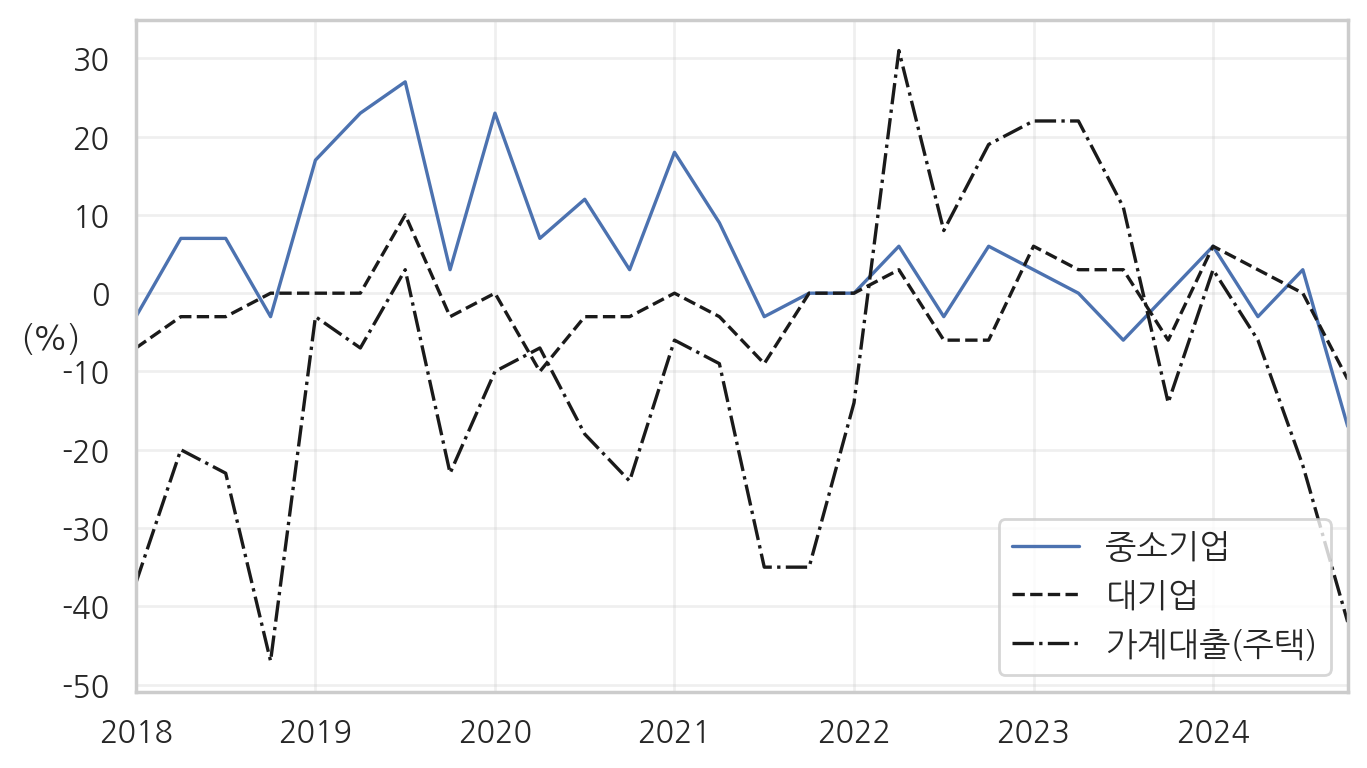

In [25]:
start_date = 2018
end_date = 2025

fig, ax = plt.subplots(figsize=(7,4))

ax = df_supply.loc[str(start_date):str(end_date),'국내은행-중소기업'].plot(ax=ax, linewidth=1.2)
ax = df_supply.loc[str(start_date):str(end_date),'국내은행-대기업'].plot(ax=ax, color='k', linestyle='--', linewidth=1.2)
ax = df_supply.loc[str(start_date):str(end_date),'국내은행-가계(주택)'].plot(ax=ax, color='k', linestyle='-.', linewidth=1.2)

ax.legend(labels=['중소기업','대기업','가계대출(주택)'], fontsize=12, loc='best')
ax.set_xlabel('')
ax.set_ylabel('(%)', rotation=0)

ax.grid(True)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

save_fig('attitude_supply')
plt.show()

Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/attitude_demand.png


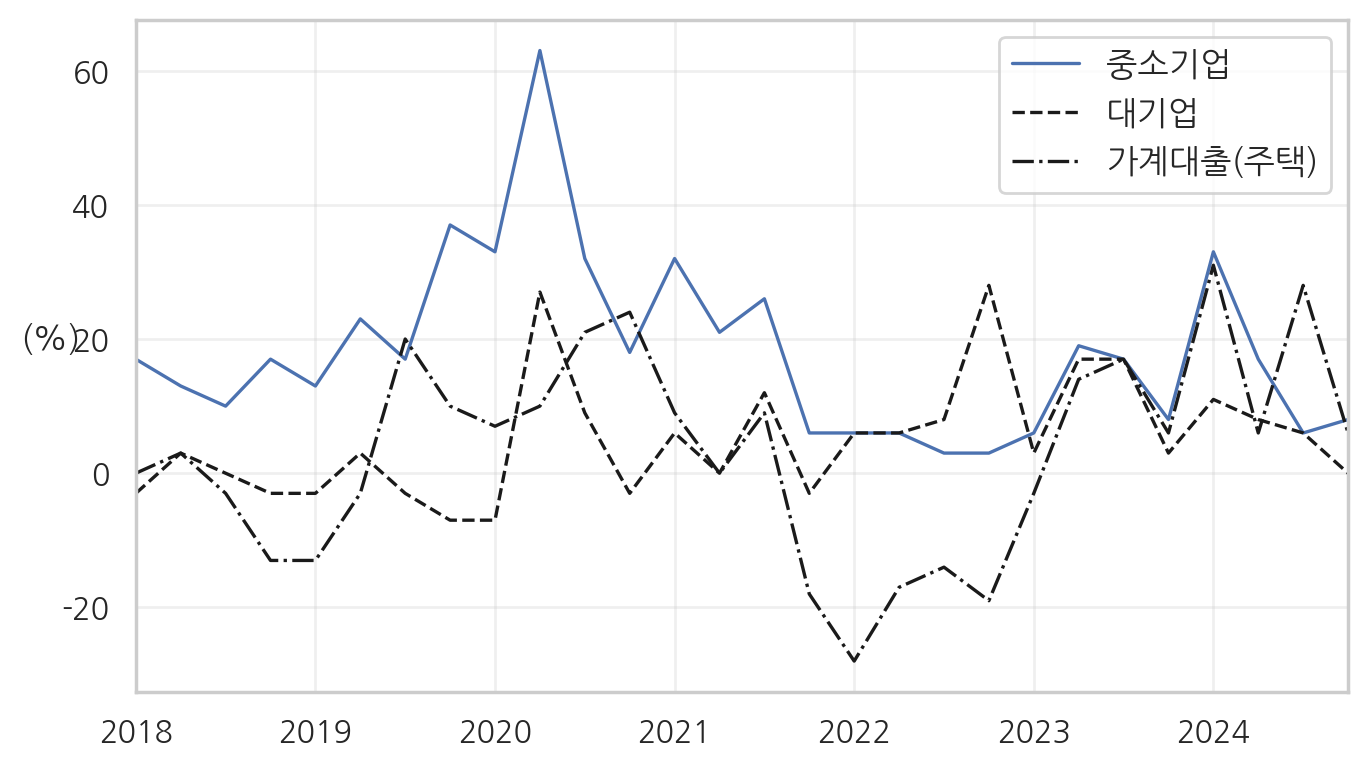

In [26]:
start_date = 2018
end_date = 2025

fig, ax = plt.subplots(figsize=(7,4))

ax = df_demand.loc[str(start_date):str(end_date),'국내은행-중소기업'].plot(ax=ax, linewidth=1.2)
ax = df_demand.loc[str(start_date):str(end_date),'국내은행-대기업'].plot(ax=ax, color='k', linestyle='--', linewidth=1.2)
ax = df_demand.loc[str(start_date):str(end_date),'국내은행-가계(주택)'].plot(ax=ax, color='k', linestyle='-.', linewidth=1.2)

ax.legend(labels=['중소기업','대기업','가계대출(주택)'], fontsize=12, loc='best')
ax.set_xlabel('')
ax.set_ylabel('(%)', rotation=0)

ax.grid(True)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

save_fig('attitude_demand')
plt.show()

## 한국은행 기준금리와 만기별 금리

In [27]:
date_start = '200601'
date_end = '202502'

# 시장금리(월, 분기, 년): 721Y001
df1 = api.get_statistic_search(통계표코드="721Y001", 주기="M",
            검색시작일자=date_start, 검색종료일자=date_end)
# 한국은행 기준금리: 722Y001
df2 = api.get_statistic_search(통계표코드="722Y001", 주기="M",
            검색시작일자=date_start, 검색종료일자=date_end)

print(df1.tail(3))
df2.tail(3)

        통계표코드                    통계명  통계항목코드1            통계항목명1 통계항목코드2  ...  \
5489  721Y001  1.3.2.2. 시장금리(월,분기,년)  8010000  회사채(3년, AA-, 민평)    None  ...   
5490  721Y001  1.3.2.2. 시장금리(월,분기,년)  8020000           MMF(7일)    None  ...   
5491  721Y001  1.3.2.2. 시장금리(월,분기,년)  8030000          CMA(수시형)    None  ...   

     통계항목명4  단위   WGT      시점      값  
5489   None  연%  None  202502  3.192  
5490   None  연%  None  202502   3.23  
5491   None  연%  None  202502   2.43  

[3 rows x 14 columns]


,통계표코드,통계명,통계항목코드1,통계항목명1,통계항목코드2,...,통계항목명4,단위,WGT,시점,값
1680,722Y001,1.3.1. 한국은행 기준금리 및 여수신금리,0111000,영세자영업자지원 프로그램대출금리,None,...,None,연%,None,202502,1.25
1681,722Y001,1.3.1. 한국은행 기준금리 및 여수신금리,0112000,지방중소기업지원 프로그램대출금리,None,...,None,연%,None,202502,1.25
1682,722Y001,1.3.1. 한국은행 기준금리 및 여수신금리,0113000,설비투자지원 프로그램대출금리,None,...,None,연%,None,202502,1.25


In [28]:
df1['통계항목명1'].value_counts()

,count
통계항목명1,
무담보콜금리(1일),230
"무담보콜금리(1일, 중개거래)",230
무담보콜금리 전체,230
CP(91일),230
CD(91일),230
국고채(1년),230
국고채(5년),230
국민주택채권1종(5년),230
국고채(3년),230


In [29]:
varlist = ['KORIBOR(3개월)','KORIBOR(6개월)','국고채(1년)','국고채(3년)','국고채(5년)','국고채(10년)','국고채(20년)']
df_kor = ECOS_generate_TS_monthly(df1,varlist)

varlist = ['한국은행 기준금리']
df_policyrate = ECOS_generate_TS_monthly(df2,varlist)

df_kor = pd.concat([df_kor, df_policyrate], axis=1)
df_kor.rename(columns={'한국은행 기준금리':'기준금리'},inplace=True)
df_kor.tail(3)

통계항목명1,KORIBOR(3개월),KORIBOR(6개월),국고채(10년),국고채(1년),국고채(20년),국고채(3년),국고채(5년),기준금리
시점,,,,,,,,
2024-12-01,3.310,3.290,2.771,2.709,2.708,2.590,2.683,3.000
2025-01-01,3.120,3.100,2.821,2.637,2.745,2.571,2.694,3.000
2025-02-01,2.980,2.960,2.830,2.654,2.746,2.611,2.710,2.750


<Axes: xlabel='시점'>

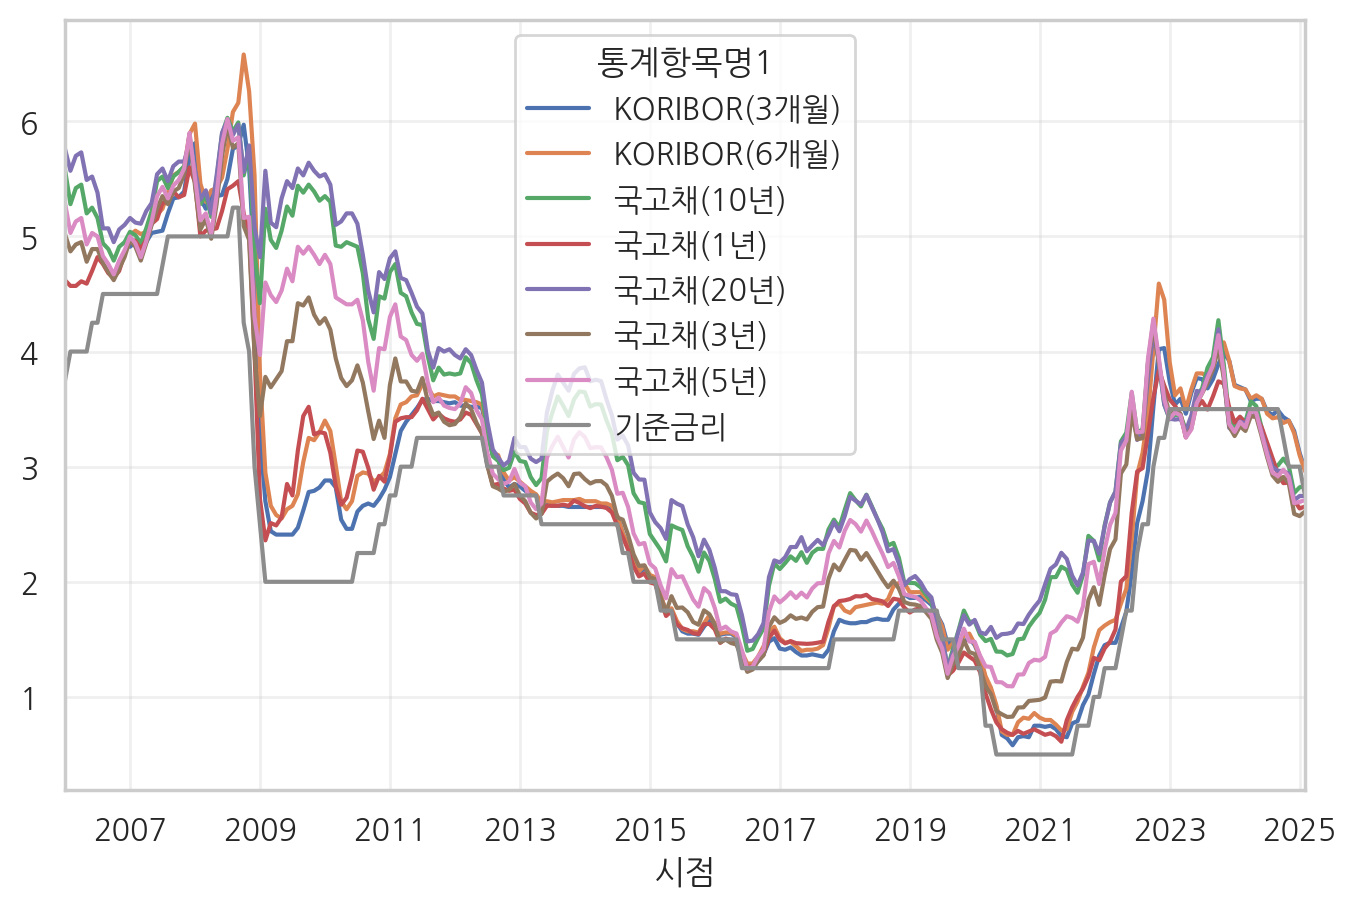

In [30]:
df_kor.plot()

In [31]:
df_kor.corr()

통계항목명1,KORIBOR(3개월),KORIBOR(6개월),국고채(10년),국고채(1년),국고채(20년),국고채(3년),국고채(5년),기준금리
통계항목명1,,,,,,,,
KORIBOR(3개월),1.000,0.995,0.826,0.984,0.804,0.920,0.871,0.983
KORIBOR(6개월),0.995,1.000,0.854,0.987,0.832,0.938,0.894,0.964
국고채(10년),0.826,0.854,1.000,0.897,0.997,0.972,0.994,0.785
국고채(1년),0.984,0.987,0.897,1.000,0.880,0.968,0.932,0.967
국고채(20년),0.804,0.832,0.997,0.880,1.000,0.958,0.985,0.765
국고채(3년),0.920,0.938,0.972,0.968,0.958,1.000,0.991,0.891
국고채(5년),0.871,0.894,0.994,0.932,0.985,0.991,1.000,0.835
기준금리,0.983,0.964,0.785,0.967,0.765,0.891,0.835,1.000
